In [103]:
!pip install tensorflow

In [104]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
epoch = 15000
batch_size = 62
alpha = 0.01
scale = 3.
center = (1.5, 1.5)
R = 1
x_domain = np.linspace(0., scale, 100)

input_d = 2
output_d = 1
hidden_d = 3

In [106]:
model = tf.keras.Sequential()

model.add(tf.layers.Dense(hidden_d, activation=tf.sigmoid, input_shape=(input_d,)))

model.add(tf.layers.Dense(output_d, activation=tf.sigmoid))

model.compile(optimizer=tf.train.GradientDescentOptimizer(.1),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])


In [107]:
def isInCircle(point, center, r):
    x, y = point
    x_c, y_c = center
    return (x - x_c) ** 2 + (y - y_c) ** 2 < r ** 2


def generate_samples(batch_size):
    X_data = scale * np.random.rand(batch_size, 2)
    Y_data = np.array([[int(isInCircle(X_data[i, :], center, R)) for i in range(batch_size)]])
    return X_data, Y_data.T


def getLineEq(w1, w2, b):
    return -x_domain*w1/w2 + b/w2

In [108]:
tX_data, ty_data = generate_samples(8000)
eX_data, ey_data = generate_samples(256)

model.fit(tX_data, ty_data, batch_size=32, epochs=50, validation_data=(eX_data, ey_data))

Train on 8000 samples, validate on 256 samples
Epoch 1/50
8000/8000 [==============================] - 0s 46us/sample - loss: 0.6402 - acc: 0.6562 - val_loss: 0.6524 - val_acc: 0.6250
Epoch 2/50
8000/8000 [==============================] - 0s 30us/sample - loss: 0.6300 - acc: 0.6562 - val_loss: 0.6417 - val_acc: 0.6250
Epoch 3/50
8000/8000 [==============================] - 0s 28us/sample - loss: 0.6196 - acc: 0.6562 - val_loss: 0.6290 - val_acc: 0.6250
Epoch 4/50
8000/8000 [==============================] - 0s 28us/sample - loss: 0.6068 - acc: 0.6562 - val_loss: 0.6166 - val_acc: 0.6250
Epoch 5/50
8000/8000 [==============================] - 0s 28us/sample - loss: 0.5926 - acc: 0.6562 - val_loss: 0.6020 - val_acc: 0.6250
Epoch 6/50
8000/8000 [==============================] - 0s 28us/sample - loss: 0.5762 - acc: 0.6553 - val_loss: 0.5784 - val_acc: 0.6250
Epoch 7/50
8000/8000 [==============================] - 0s 27us/sample - loss: 0.5588 - acc: 0.6522 - val_loss: 0.5599 - val_acc: 0

In [109]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    W, b = model.get_layer(index=0).kernel.eval().T, model.get_layer(index=0).bias.eval()
    print(W.shape)
    print(b.shape)

(3, 2)
(3,)


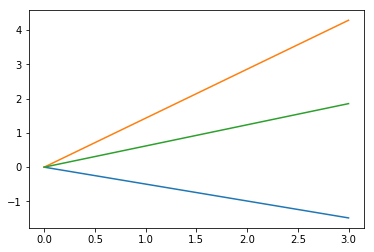

In [110]:
%matplotlib inline
for i in range(W.shape[0]):
    w = W[i]
    bs = b[i]
    plt.plot(x_domain, getLineEq(*w, b=bs), label="model separation")

plt.show()